# Lesson 19 - Sorting, Grouping, and Aggregating in Pandas


### The following topics are discussed in this notebook:
* The `dataframe` data type from the `pandas` package. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gapminder Dataset

In [2]:
gm = pd.read_csv('data/gapminder_updated.txt', sep='\t')
gm.head()

,country,year,continent,population,life_exp,gdp_per_cap,gini
0,Afghanistan,1800,asia,3280000,28.2,603,30.5
1,Albania,1800,europe,410000,35.4,667,38.9
2,Algeria,1800,africa,2500000,28.8,715,56.2
3,Angola,1800,africa,1570000,27.0,618,57.2
4,Antigua and Barbuda,1800,americas,37000,33.5,757,40.0


In [3]:
gm.describe()

,year,population,life_exp,gdp_per_cap,gini
count,40296.00000,4.029600e+04,40296.000000,40296.000000,40296.000000
mean,1909.00000,1.375962e+07,43.031052,4585.009033,40.054174
std,63.21998,6.616676e+07,16.246992,10176.578866,9.176664
min,1800.00000,2.130000e+03,1.000000,247.000000,16.000000
25%,1854.00000,4.190000e+05,31.100000,875.000000,34.000000
50%,1909.00000,2.000000e+06,35.500000,1440.000000,40.000000
75%,1964.00000,6.540000e+06,55.600000,3460.000000,45.000000
max,2018.00000,1.420000e+09,84.200000,178000.000000,79.900000


## Add new columns

We will start by adding new columns for total GDP and for the population weighted life expectency.

In [4]:
gm.loc[:,'total_gdp'] = gm.loc[:,'population'] * gm.loc[:,'gdp_per_cap']
gm.loc[:,'total_life_exp'] = gm.loc[:,'population'] * gm.loc[:,'life_exp']
gm.head()

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
0,Afghanistan,1800,asia,3280000,28.2,603,30.5,1977840000,92496000.0
1,Albania,1800,europe,410000,35.4,667,38.9,273470000,14514000.0
2,Algeria,1800,africa,2500000,28.8,715,56.2,1787500000,72000000.0
3,Angola,1800,africa,1570000,27.0,618,57.2,970260000,42390000.0
4,Antigua and Barbuda,1800,americas,37000,33.5,757,40.0,28009000,1239500.0


## Filtering 2018 Data 

In [6]:
#gm_2018 = gm.loc[gm.loc[:,'year'] == 2018,:]
gm_2018 = gm.loc[gm.year == 2018,:]
print(len(gm_2018))

184


## Sorting

We will sort by Gini index to find the 10 countries with the least amount of income inequality, as well as the 10 countries with the greatest income inequality.

In [7]:
gm_2018.sort_values(by='gini').head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40284,Ukraine,2018,europe,44000000,72.3,8330,25.0,366520000000,3.181200e+09
40257,Slovenia,2018,europe,2080000,81.1,30900,25.4,64272000000,1.686880e+08
40156,Czech Republic,2018,europe,10600000,79.4,32300,25.9,342380000000,8.416400e+08
40219,Moldova,2018,europe,4040000,72.4,5330,26.4,21533200000,2.924960e+08
40256,Slovak Republic,2018,europe,5450000,77.2,31400,26.5,171130000000,4.207400e+08
40199,Kyrgyz Republic,2018,asia,6130000,71.5,3490,26.8,21393700000,4.382950e+08
40195,Kazakhstan,2018,asia,18400000,72.0,24200,26.9,445280000000,1.324800e+09
40126,Belarus,2018,europe,9450000,73.8,17200,27.0,162540000000,6.974100e+08
40168,Finland,2018,europe,5540000,82.1,40300,27.1,223262000000,4.548340e+08
40233,Norway,2018,europe,5350000,82.4,64800,27.5,346680000000,4.408400e+08


In [8]:
gm_2018.sort_values(by='gini', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40260,South Africa,2018,africa,57400000,63.5,12300,63.0,706020000000,3.644900e+09
40268,Suriname,2018,americas,568000,71.6,13200,61.0,7497600000,4.066880e+07
40133,Botswana,2018,africa,2330000,66.9,16500,60.5,38445000000,1.558770e+08
40225,Namibia,2018,africa,2590000,65.7,10500,59.1,27195000000,1.701630e+08
40294,Zambia,2018,africa,17600000,59.5,3860,57.1,67936000000,1.047200e+09
40143,Central African Republic,2018,africa,4740000,51.6,689,56.2,3265860000,2.445840e+08
40203,Lesotho,2018,africa,2260000,51.1,2960,54.2,6689600000,1.154860e+08
40223,Mozambique,2018,africa,30500000,61.1,1200,54.0,36600000000,1.863550e+09
40128,Belize,2018,americas,382000,72.5,7710,53.3,2945220000,2.769500e+07
40269,Swaziland,2018,africa,1390000,58.6,7600,51.5,10564000000,8.145400e+07


We will now find the 10 countries with the lowest life expectency, as well as the 10 countries with the greatest life expectency.

In [9]:
gm_2018.sort_values(by='life_exp').head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40203,Lesotho,2018,africa,2260000,51.1,2960,54.2,6689600000,1.154860e+08
40143,Central African Republic,2018,africa,4740000,51.6,689,56.2,3265860000,2.445840e+08
40259,Somalia,2018,africa,15200000,58.0,629,48.0,9560800000,8.816000e+08
40269,Swaziland,2018,africa,1390000,58.6,7600,51.5,10564000000,8.145400e+07
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8,68068000000,2.136680e+09
40294,Zambia,2018,africa,17600000,59.5,3860,57.1,67936000000,1.047200e+09
40179,Guinea-Bissau,2018,africa,1910000,59.7,1550,50.7,2960500000,1.140270e+08
40254,Sierra Leone,2018,africa,7720000,60.0,1490,34.0,11502800000,4.632000e+08
40295,Zimbabwe,2018,africa,16900000,60.2,1950,43.2,32955000000,1.017380e+09
40144,Chad,2018,africa,15400000,60.5,1860,43.3,28644000000,9.317000e+08


In [10]:
gm_2018.sort_values(by='life_exp', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40193,Japan,2018,asia,127000000,84.2,39100,32.1,4965700000000,1.069340e+10
40255,Singapore,2018,asia,5790000,84.0,83900,40.9,485781000000,4.863600e+08
40271,Switzerland,2018,europe,8540000,83.5,57100,32.3,487634000000,7.130900e+08
40263,Spain,2018,europe,46400000,83.2,34700,36.2,1610080000000,3.860480e+09
40119,Australia,2018,asia,24800000,82.9,45800,32.3,1135840000000,2.055920e+09
40191,Italy,2018,europe,59300000,82.6,35200,35.4,2087360000000,4.898180e+09
40184,Iceland,2018,europe,338000,82.6,47400,27.8,16021200000,2.791880e+07
40169,France,2018,europe,65200000,82.6,39000,32.7,2542800000000,5.385520e+09
40233,Norway,2018,europe,5350000,82.4,64800,27.5,346680000000,4.408400e+08
40207,Luxembourg,2018,europe,590000,82.4,99000,33.8,58410000000,4.861600e+07


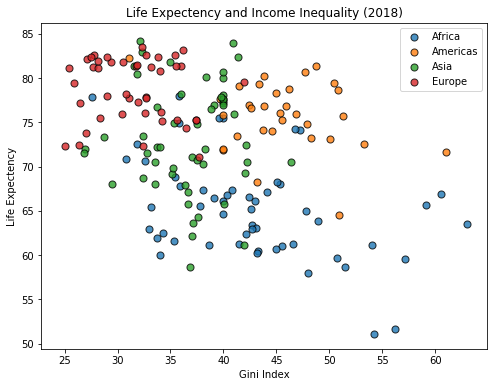

In [11]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_map = plt.get_cmap('tab10')

plt.figure(figsize = [8,6])
for i, c in enumerate(continent_list):

    plt.scatter(gm_2018.loc[gm_2018.continent == c,'gini'], 
                gm_2018.loc[gm_2018.continent == c,'life_exp'],
                s=50, edgecolor='k', alpha=0.8, label=c.title(),
                #color=color_map.colors[i])

plt.xlabel('Gini Index')
plt.ylabel('Life Expectency')
plt.title('Life Expectency and Income Inequality (2018)')   
plt.legend()
plt.show()
    


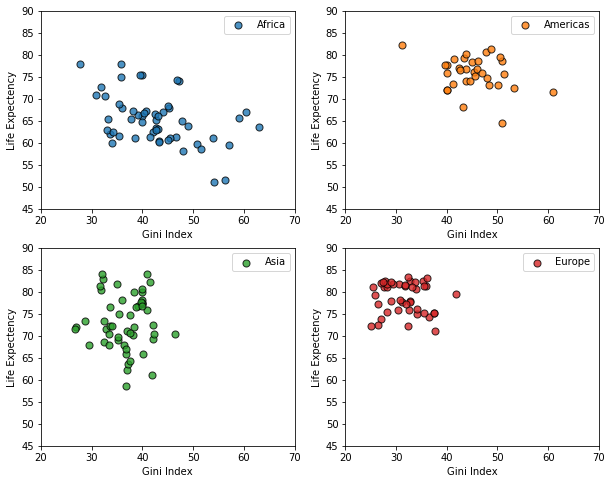

In [13]:
plt.figure(figsize = [10,8])


for i, c in enumerate(continent_list):
   
    plt.subplot(2,2,i+1)
    plt.scatter(gm_2018.loc[gm_2018.continent == c,'gini'], 
                gm_2018.loc[gm_2018.continent == c,'life_exp'],
                s=50, edgecolor='k', alpha=0.8, label=c.title(),
                color=color_map.colors[i])

    plt.xlim([20,70])
    plt.ylim([45,90])
    plt.xlabel('Gini Index')
    plt.ylabel('Life Expectency')
    plt.legend()
    #plt.title('Life Expectency and Income Inequality (2018)')   

plt.show()

## Global Population, Per Capita GDP, and Life Expectency in 2018

In [17]:
total_pop_2018 = gm_2018.loc[:, 'population'].sum()
print(total_pop_2018)

7595200200


In [18]:
total_gdp_2018 = gm_2018.loc[:, 'total_gdp'].sum()
print(total_gdp_2018)

118225647770000


In [19]:
pcgdp_2018 = total_gdp_2018 / total_pop_2018
print(pcgdp_2018)

15565.836930802692


## Grouping: Per Capita GDP and Life Expectency By Continent

In the cell below, we will calculate the per capita GDP for Africa in 2018.

In [20]:
africa_gdp_2018 = gm_2018.loc[gm.loc[:, 'continent'] == 'africa',
                              'total_gdp'].sum()
africa_pop_2018 = gm_2018.loc[gm.loc[:, 'continent'] == 'africa',
                              'population'].sum()
africa_pcgdp_2018 = africa_gdp_2018 / africa_pop_2018
print(africa_pcgdp_2018)

4699.924927176331


We will now use grouping operations to calcuate the per capita GDP and life expectency for each continents in 2018. We will start by finding the total population, total GDP, and population weighted life expectency of each continent.

In [21]:
grouped = gm_2018.loc[:,['continent','population',
                         'total_gdp', 'total_life_exp']
                     ].groupby('continent').sum()
grouped

,population,total_gdp,total_life_exp
continent,,,
africa,1287150200,6049509310000,8.477140e+10
americas,1010978000,29023263900000,7.840079e+10
asia,4455113000,56602608160000,3.261415e+11
europe,841959000,26550266400000,6.600596e+10


We will now caluclate per capita GDP and life expectency of each continent.

In [22]:
grouped.loc[:,'pc_gdp'] = grouped.loc[:,'total_gdp'] / grouped.loc[:,'population']
grouped.loc[:,'life_exp'] = grouped.loc[:,'total_life_exp'] / grouped.loc[:,'population']
grouped.loc[:,['pc_gdp', 'life_exp']]

,pc_gdp,life_exp
continent,,
africa,4699.924927,65.859754
americas,28708.106309,77.549455
asia,12705.089222,73.206120
europe,31533.918397,78.395693


We could perform the calculate above by starting with the original DataFrame, and chaining together operations without storing any intermediate DataFrames to variables.

In [ ]:
def temp_fn(df):
    

In [26]:
gm.loc[gm.year == 2018, ['continent', 'population', 
                         'total_gdp', 'total_life_exp']].\
    groupby('continent').sum().\
    assign(pcgdp = lambda df : df.total_gdp / df.population).\
    assign(life_exp = lambda df : df.total_life_exp / df.population).\
    loc[:,['pcgdp','life_exp']]
    #filter(['pcgdp', 'life_exp'])

,pcgdp,life_exp
continent,,
africa,4699.924927,65.859754
americas,28708.106309,77.549455
asia,12705.089222,73.206120
europe,31533.918397,78.395693


We can use grouping DataFrames by more than one column. In the next few cells, we will use grouping to find the per capita gdp and life expectency of each continent and for each year. 

In [29]:
gm.loc[:, ['continent', 'year', 'population', 'total_gdp']].\
    groupby(['continent', 'year']).sum().head()

population    total_gdp
continent year                         
africa    1800    73255300  48062546100
          1801    73319600  48170866900
          1802    73351000  48243936900
          1803    73404400  48342184700
          1804    73437800  48410626400

In [30]:
gm_yc =\
    gm.loc[:, ['continent', 'year', 'population', 'total_gdp', 'total_life_exp']].\
    groupby(['continent', 'year']).sum().\
    assign(pcgdp = lambda df : df.total_gdp / df.population).\
    assign(life_exp = lambda df : df.total_life_exp / df.population).\
    filter(['pcgdp', 'life_exp'])

gm_yc.head()

pcgdp   life_exp
continent year                       
africa    1800  656.096502  30.213386
          1801  656.998496  30.128163
          1802  657.713418  30.128411
          1803  658.573392  30.215203
          1804  659.205837  30.215215

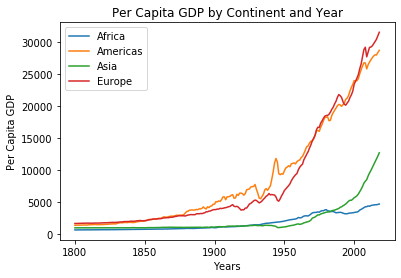

In [31]:
years = range(1800, 2019)
plt.plot(years, gm_yc.loc['africa','pcgdp'], label='Africa')
plt.plot(years, gm_yc.loc['americas','pcgdp'], label='Americas')
plt.plot(years, gm_yc.loc['asia','pcgdp'], label='Asia')
plt.plot(years, gm_yc.loc['europe','pcgdp'], label='Europe')
plt.xlabel("Years")
plt.ylabel("Per Capita GDP")
plt.title("Per Capita GDP by Continent and Year")
plt.legend()
plt.show()

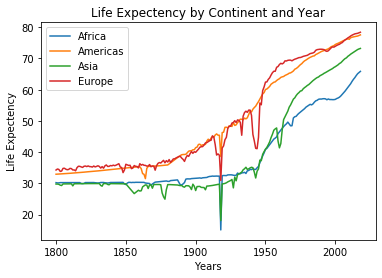

In [33]:
years = range(1800, 2019)
plt.plot(years, gm_yc.loc['africa','life_exp'], label='Africa')
plt.plot(years, gm_yc.loc['americas','life_exp'], label='Americas')
plt.plot(years, gm_yc.loc['asia','life_exp'], label='Asia')
plt.plot(years, gm_yc.loc['europe','life_exp'], label='Europe')
plt.xlabel("Years")
plt.ylabel("Life Expectency")
plt.title("Life Expectency by Continent and Year")
plt.legend()
plt.show()

In [35]:
gm.sort_values(by='life_exp').head()

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
13855,Fiji,1875,asia,129000,1.00,949,35.3,122421000,129000.0
21848,Samoa,1918,asia,36700,1.09,2050,42.1,75235000,40003.0
3664,Tunisia,1819,africa,884000,1.50,717,74.4,633828000,1326000.0
12432,Mauritius,1867,africa,321000,4.00,1180,38.6,378780000,1284000.0
16614,Ethiopia,1890,africa,7830000,4.01,537,47.7,4204710000,31398300.0


In [41]:
gm.loc[(gm.country == 'Fiji') & (gm.year > 1850),:]

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
9439,Fiji,1851,asia,137000,26.1,875,35.3,119875000,3575700.0
9623,Fiji,1852,asia,136000,26.1,877,35.3,119272000,3549600.0
9807,Fiji,1853,asia,136000,26.1,880,35.3,119680000,3549600.0
9991,Fiji,1854,asia,136000,26.1,883,35.3,120088000,3549600.0
10175,Fiji,1855,asia,135000,26.1,886,35.3,119610000,3523500.0
10359,Fiji,1856,asia,135000,26.1,889,35.3,120015000,3523500.0
10543,Fiji,1857,asia,135000,26.1,892,35.3,120420000,3523500.0
10727,Fiji,1858,asia,134000,26.1,896,35.3,120064000,3497400.0
10911,Fiji,1859,asia,134000,26.1,899,35.3,120466000,3497400.0
11095,Fiji,1860,asia,134000,26.1,902,35.3,120868000,3497400.0
